<a href="https://colab.research.google.com/github/eduardo20/blazars/blob/master/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Idea juntar varios arboles
https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install ipynb
#!pip install ipywidgets==7.4

In [0]:

import sys
import os
sys.path.append('/content/drive/My Drive/')
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import ipynb.fs.full.my_functions_c as mf
#import warnings
#warnings.filterwarnings('ignore')
#import ipynb.fs.full.my_functions
#from ipynb.fs.full.my_functions import Snippet_188_a, Snippet_191,Snippet_192,Snippet_190, ROC_

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree
from sklearn import tree as tr_
import pydotplus
import collections

import ipywidgets as widgets
#import load_clean

#%run my_functions_c.py

In [0]:
%ls



drive/  sample_data/


# Lista de caracteristicas posibles del modelo, de entre ellas se prueban disitintas selecciones:
features_=['ra', 'dec', 'flux_1_100_gev', 'spectral_index', 'spectral_index_error',
          'detection_significance', 'lii', 'bii', 'pivot_energy', 'flux_density',
          'flux_density_error', 'energy_flux', 'energy_flux_error',
          'curve_significance', 'spectrum_type', 'powerlaw_index',
          'flux_100_300_mev', 'flux_100_300_mev_pos_err',
          'flux_100_300_mev_neg_err', 'nufnu_100_300_mev', 'sqrt_ts_100_300_mev',
          'flux_0p3_1_gev', 'flux_0p3_1_gev_pos_err', 'flux_0p3_1_gev_neg_err',
          'nufnu_0p3_1_gev', 'sqrt_ts_0p3_1_gev', 'flux_1_3_gev',
          'flux_1_3_gev_pos_err', 'flux_1_3_gev_neg_err', 'nufnu_1_3_gev',
          'sqrt_ts_1_3_gev', 'flux_3_10_gev', 'nufnu_3_10_gev',
          'sqrt_ts_3_10_gev', 'flux_10_100_gev', 'nufnu_10_100_gev',
          'sqrt_ts_10_100_gev', 'variability_index', 'significance_peak',
          'flux_peak', 'flux_peak_error', 'time_peak', 'time_peak_interval',
          'source_type', 'analysis_flags', 'HR12', 'HR23', 'HR34', 'hard_slope',
          'soft_slope', 'P_E_lg', 'TS_', 'sig_', 'gamm_log', 'Ts_log', 'sig_log',
          'F100_log']

  


# Trabajamos con 3 separciones poblacionales 

1.   pop1
2.   pop2
3.   full
## La separación de estas poblaciones se puede encontrar en:
https://colab.research.google.com/drive/1D4dCevS0IlVaqjwkLjBT4RaQilZmDatu#scrollTo=vuzPV4sqrstv


In [0]:
features_=[ 'flux_1_100_gev', 'spectral_index', 
          'detection_significance', 'pivot_energy', 'flux_density',
          'energy_flux',
          'curve_significance', 'spectrum_type', 'powerlaw_index',
          'flux_100_300_mev', 'nufnu_100_300_mev', 'sqrt_ts_100_300_mev',
          'flux_0p3_1_gev', 'flux_0p3_1_gev_neg_err',
          'nufnu_0p3_1_gev', 'sqrt_ts_0p3_1_gev', 'flux_1_3_gev',
          'nufnu_1_3_gev','sqrt_ts_1_3_gev', 'flux_3_10_gev', 'nufnu_3_10_gev',
          'sqrt_ts_3_10_gev', 'flux_10_100_gev', 'nufnu_10_100_gev',
          'sqrt_ts_10_100_gev', 'variability_index', 'significance_peak',
          'flux_peak', 'flux_peak_error', 'time_peak', 'time_peak_interval',
          'source_type', 'analysis_flags', 'HR12', 'HR23', 'HR34', 'hard_slope',
          'soft_slope', 'P_E_lg', 'TS_', 'sig_', 'gamm_log', 'Ts_log', 'sig_log',
          'F100_log']
     
#----------------------------------------------------------------------#
# Carga el dataframe de la poblacion, lo devuelve limpio, separadas las caracteristicas (X sin normalizar, X_std normalizadas) de las etiquetas (y_) más una copia completa del dataframe df0
# Sintaxis:
# X,y_,df0,X_std=load_clean(poblacion(int),features del modelo[lista]) 
X, y_, df0, X_std=mf.load_clean(3,features_)
#----------------------------------------------------------------------#

print ("nº de características del modelo :",len(features_))

Cargando full
(1717, 57)
nº de características del modelo : 45


In [0]:
   
def reduce_features (features_,df):
  from sklearn.preprocessing import StandardScaler
  new_df=df[features_]
  #df.drop(['source_type'], axis=1, inplace=True)
  sc = StandardScaler()
  sc.fit(X)
  #sc.fit(y)
  X_std = sc.transform(X)
  return new_df,X_std
#X,X_std=reduce_features(features_,X) 
#df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')
#df0.head(20)
#!pip install eli5
#from notebook.services.config import ConfigManager
#cm = ConfigManager().update('notebook', {'limit_output': 10})




In [0]:
#%%capture salida
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 10})
from ipywidgets import  interact, widget  
from ipywidgets import  interact_manual
#from ipywidgets  import TwoByTwoLayout, AppLayout, GridspecLayout
from ipywidgets import interactive,interact, HBox, Layout,VBox
from IPython.utils import io


from ipywidgets import IntSlider
net=len(features_)
#import eli5
#from eli5.sklearn import PermutationImportance
#size_subset = [0.2,0.25,0.3,0.35,0.4]
#@interact
@widgets.interact_manual(
    color=['blue', 'red', 'green'], lw=(1., 10.))



def echo(Learning_init='0.001', size_subset=[0.2, 0.25, 0.3,0.35, 0.4],activation=['identity', 'logistic', 'tanh', 'relu'],Learning_rate=['constant', 'invscaling', 'adaptive'],max_iter=IntSlider(min=200, max=3000, step=100),Save_model=False):

  # hay que devolver X_std normalizado con el numero de caracteriscitcas reducidas usando reduce_features()
  X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=size_subset, random_state=27)
  tree = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(net, 2*net, 2), learning_rate=Learning_rate,
              learning_rate_init=np.float(Learning_init), max_fun=15000, max_iter=max_iter,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=21, shuffle=True, solver='sgd',
              tol=1e-09, validation_fraction=0.1, verbose=10, warm_start=False)
  
  #suprimir salida en pantalla del entrenamiento
  print('Entrenando modelo')
  with io.capture_output() as captured:    
    
    clf =tree.fit(X_train, y_train);
  echo.widget.layout.flex_flow='row wrap'
  # widget=interactive(echo,Save='Salvar archivo como...', size_subset=[0.2,0.25,0.3,0.35,0.4],loss=['entropy','gini'],split=100)
  #controls = HBox(widget.children[:-1], layout = Layout(flex_flow='row wrap'))
  #output = widget.children[-1]
  #display(VBox([controls, output]))  


  print("test score: ",tree.score(X_test, y_test))
  print("train score: ",tree.score(X_train, y_train))
  print('Cross validation score with std desv')
  #suprimir salida en pantalla del entrenamiento
  print('Prediciendo escore con des est.')
  with io.capture_output() as captured:    
    a,b=mf.Snippet_192(tree, X_test, y_test)
  #ab=np.str(a)  
  #suprimir salida en pantalla del entrenamiento
  print("Accuracy: %0.2f (+/- %0.2f)" % (a , b*2) )
  print('Prediciendo resultados')
  with io.capture_output() as captured: 
    y_pred = tree.predict(X_test);
  print(confusion_matrix(y_test, y_pred))
  #plt.figure(figsize=(30,15))
  #plt.suptitle("Decision surface of a decision tree using paired features")
  #plt.legend(loc='lower right', borderpad=0, handletextpad=0)
  #plt.axis("tight")
 
  if Save_model == True :
    print(' Salvando modelo')
    import pickle

      #from google.colab import files
      #files.download('your typical text file or what ever.txt')
      # Create your model here (same as above)
      #

      # Save to file in the current working directory
    model=tree
    pkl_filename = "/content/drive/My Drive/NN-pickle_model.pkl"
    with open(pkl_filename, 'wb') as file:
          pickle.dump(model, file)


  return tree
  



interactive(children=(Text(value='0.001', description='Learning_init'), Dropdown(description='size_subset', op…

In [0]:
#salida.outputs.reverse
#salida.show()


In [0]:
import pickle

# Load from file
pkl_filename = "/content/drive/My Drive/NN-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
#df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')
#Calculate the accuracy score and predict target values from recovered model
X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.3)
#suprimir salida en pantalla del entrenamiento
print('Usando modelo recuperado sobre X_test')
with io.capture_output() as captured: 
  score = pickle_model.score(X_test, y_test)
print('ok')
print("Test score: {0:.2f} %".format(100 * score))
print('Prediciendo escore con des est.')
with io.capture_output() as captured:    
  a,b=mf.Snippet_192(pickle_model, X_test, y_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (a , b*2) )


Usando modelo recuperado sobre X_test
ok
Test score: 90.41 %
Prediciendo escore con des est.
Accuracy: 0.87 (+/- 0.10)


MLPClassifier
********************Hoe to evaluate model with learning curves********************


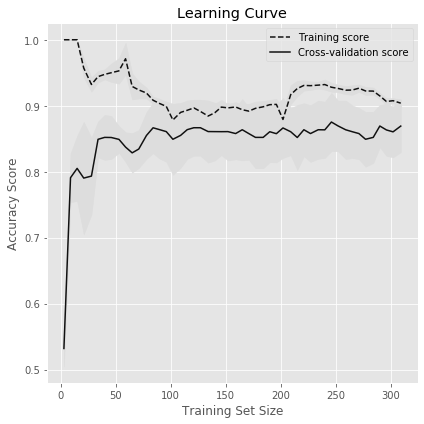

In [0]:
#mf.Snippet_192(pickle_model, X_test, y_test)
# featrues -> NO EN ESTE CLASIFICADOR mf.Snippet_191(pickle_model, X_test, y_test)
mf.Snippet_188(X_test, y_test,pickle_model)

*********************Hoe to visualise cross validation scores*********************
Iteration 1, loss = 0.70522853
Iteration 2, loss = 0.70457449
Iteration 3, loss = 0.70373510
Iteration 4, loss = 0.70267917
Iteration 5, loss = 0.70145789
Iteration 6, loss = 0.70014887
Iteration 7, loss = 0.69881322
Iteration 8, loss = 0.69745888
Iteration 9, loss = 0.69609249
Iteration 10, loss = 0.69495030
Iteration 11, loss = 0.69380223
Iteration 12, loss = 0.69277799
Iteration 13, loss = 0.69180747
Iteration 14, loss = 0.69090740
Iteration 15, loss = 0.69017277
Iteration 16, loss = 0.68959279
Iteration 17, loss = 0.68915852
Iteration 18, loss = 0.68876299
Iteration 19, loss = 0.68844306
Iteration 20, loss = 0.68817335
Iteration 21, loss = 0.68791453
Iteration 22, loss = 0.68767091
Iteration 23, loss = 0.68747026
Iteration 24, loss = 0.68735766
Iteration 25, loss = 0.68726460
Iteration 26, loss = 0.68718033
Iteration 27, loss = 0.68710411
Iteration 28, loss = 0.68703148
Iteration 29, loss = 0.6869593

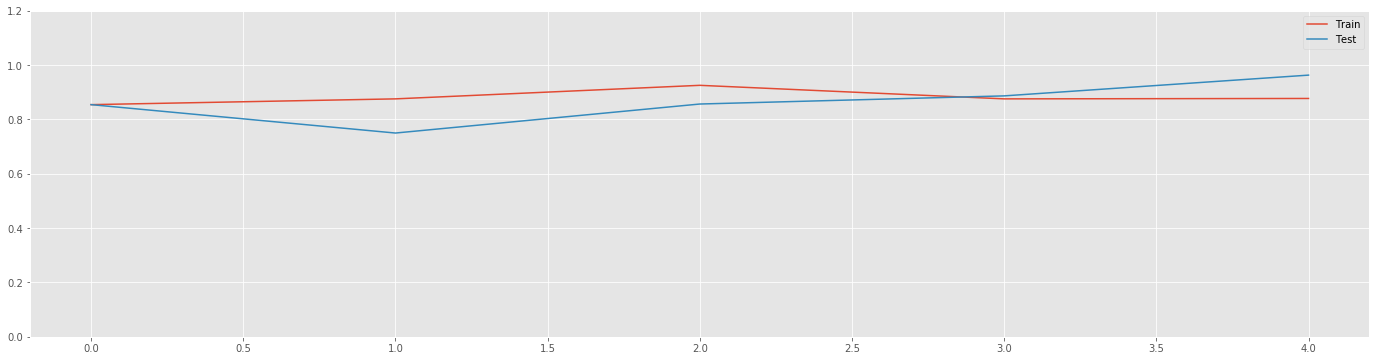

In [0]:
mf.Snippet_190(pickle_model, X_test, y_test, 5)

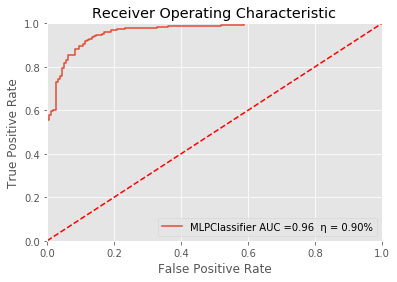

In [0]:
mf.ROC_(pickle_model, X_test,y_test )

#In order to rebuild a similar model with future versions of scikit-learn, additional metadata should be saved along the pickled model:
The training data, e.g. a reference to an immutable snapshot

The python source code used to generate the model

The versions of scikit-learn and its dependencies

The cross validation score obtained on the training data

This should make it possible to check that the cross-validation score is in the same range as before.

In [0]:
import pickle

#from google.colab import files
#files.download('your typical text file or what ever.txt')
# Create your model here (same as above)
#

# Save to file in the current working directory
#model=tree
#pkl_filename = "/content/drive/My Drive/tree(3-1)-pickle_model.pkl"
#with open(pkl_filename, 'wb') as file:
#    pickle.dump(model, file)
#Ojo se queda convertido en cero
df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')
print(df_UNK.shape)
# Load from file
pkl_filename = "/content/drive/My Drive/NN-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
#Calculate the accuracy score and predict target values from recovered model

df_pre=df_UNK.copy()
df_pre=df_pre[features_]
df_pre.drop(['source_type'], axis=1, inplace=True)
print('Dataframe con AGNs a clasificar :', df_pre.shape)
print('Caracteristicas del modelo entrenado:', len(features_)-1)
print('¡Deben ser iguales!')
#normalizamos el dtaframe A PREDECIR
sc = StandardScaler()
sc.fit(df_pre)
df_pre_std = sc.transform(df_pre)

#X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.3)
#score = pickle_model.score(X_test, y_test)
#print("Test score: {0:.2f} %".format(100 * score))
#Snippet_192(pickle_model, X_test, y_test)
pickle_model.get_params


(573, 58)
Dataframe con AGNs a clasificar : (573, 44)
Caracteristicas del modelo entrenado: 44
¡Deben ser iguales!


<bound method BaseEstimator.get_params of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(45, 90, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=800,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=21, shuffle=True, solver='sgd',
              tol=1e-09, validation_fraction=0.1, verbose=10, warm_start=False)>

#PREDICCION USANDO EL MODELO SALVADO

In [0]:
# REDECIMOS USANDO EL DATAFRAME INCOGNITA CON EL MODELO ENTRENADO, SALVADO Y VUELTO A CARGAR CON PICKLE_MODEL
#-----------------------------------------------------------------#
Ypredict = pickle_model.predict(df_pre_std)
#-----------------------------------------------------------------#
#Ypredict

In [0]:
#df_UNK.head(20)
#df_pre.head(5)
#X_std.shape
#COMPLETAMOS EL DATAFRAME DE LOS BLAZARS DESCONOCIDOS CON NUESTRA PREDICCIÓN 
 #-----------------------------------------------------------------# 
df_UNK['source_type']=Ypredict
df_UNK.head(5)
#-----------------------------------------------------------------#


,Unnamed: 0,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log
0,117,170.807907,-64.260902,1.268470e-09,2.24084,0.10782,14.025361,293.535187,-3.010400,339.359985,6.514200e-11,7.074700e-12,2.629280e-11,2.118950e-12,4.524,2,2.6114,5.874740e-08,6.184800e-09,-6.154550e-09,1.469530e-11,9.574000,1.306430e-08,1.428180e-09,-1.413830e-09,8.282390e-12,9.663000,1.216690e-09,2.746420e-10,-2.659180e-10,2.492240e-12,4.895000,9.437780e-11,4.955250e-13,1.854000,2.818170e-11,2.611100e-13,2.527,210.782593,9.025927,3.128840e-07,3.964350e-08,54725.683594,2630000,0.0,0,-0.636151,-0.829607,-0.856029,0.026422,0.193456,2.530661,15.028675,0.322559,0.350411,1.176921,-0.491391,-8.896720
1,118,202.240402,-56.130901,6.763560e-09,2.21938,0.03290,46.079670,308.176086,6.358300,582.570007,3.501100e-11,1.167800e-12,7.046150e-11,2.359720e-12,5.998,2,2.3404,9.235340e-08,8.233390e-09,-8.233390e-09,2.237260e-11,11.952000,2.821480e-08,1.211760e-09,-1.211760e-09,1.891400e-11,27.768000,5.441840e-09,2.938120e-10,-2.938120e-10,1.247090e-11,26.823999,9.965950e-10,6.266210e-12,18.434000,1.578590e-10,1.893100e-12,9.420,788.263062,16.583115,3.443660e-07,3.004300e-08,56004.156250,2630000,0.0,0,-0.531969,-0.676626,-0.690423,0.013797,0.144657,2.765348,17.106525,0.130166,0.346232,1.233162,-0.885503,-8.169825
2,119,159.735199,-53.186100,1.939800e-09,2.31971,0.07696,24.437548,283.751587,4.679100,327.359985,7.086100e-11,3.901800e-12,3.157340e-11,1.598800e-12,5.330,2,2.6188,5.444920e-08,4.922340e-09,-4.922340e-09,1.305460e-11,11.671000,1.373480e-08,9.768080e-10,-9.768080e-10,8.842370e-12,15.994000,1.892330e-09,2.139180e-10,-2.063610e-10,4.104160e-12,11.592000,1.549630e-10,8.952460e-13,4.716000,1.032650e-14,1.008050e-16,0.000,914.668640,22.781076,5.224050e-07,3.202220e-08,56004.156250,2630000,0.0,0,-0.597125,-0.757815,-0.848617,0.090802,0.160689,2.515026,37.428822,0.218107,0.365434,1.573206,-0.661330,-8.712243
3,120,276.320709,-52.509300,1.993040e-09,2.01742,0.08697,21.572411,342.269989,-17.464701,714.700012,5.416700e-12,3.985900e-13,1.649350e-11,1.321550e-12,3.863,2,2.2269,1.263060e-08,3.067500e-09,-3.020100e-09,3.179230e-12,4.266000,7.096370e-09,6.141310e-10,-6.141310e-10,4.914550e-12,13.680000,1.576740e-09,1.665220e-10,-1.591710e-10,3.672690e-12,13.956000,2.878620e-10,1.822500e-12,8.611000,6.177760e-11,7.242330e-13,5.219,310.308960,13.392247,9.469290e-08,1.144430e-08,55395.359375,2630000,0.0,0,-0.280541,-0.636407,-0.691235,0.054828,0.355866,2.854124,14.384529,0.179071,0.304796,1.157896,-0.746974,-8.700484
4,121,32.697201,-51.028198,4.740330e-09,2.16971,0.03282,62.947647,276.111694,-61.767799,385.059998,5.930000e-11,1.618200e-12,5.107200e-11,1.523330e-12,4.746,2,2.3031,6.790450e-08,3.436410e-09,-3.436410e-09,1.627360e-11,22.070999,1.822940e-08,6.762120e-10,-6.762120e-10,1.217990e-11,38.094002,4.268660e-09,2.105200e-10,-2.105200e-10,9.830760e-12,38.015999,7.063220e-10,4.505460e-12,20.693001,9.707360e-11,1.242470e-12,8.745,1444.283813,27.729914,4.094160e-07,2.493990e-08,54756.121094,2630000,0.0,0,-0.576720,-0.620531,-0.716050,0.095520,0.043811,2.585528,22.944206,0.075396,0.336402,1.360673,-1.122652,-8.324191


In [0]:
# RECUENTO DE CLASIFICACION
print ('Bl Lac = 1 -- FSRQ = 0 -- UNKNOWN = 2 ')
df0['source_type'].apply(pd.Series).stack().value_counts()
#Ypredict


Bl Lac = 1 -- FSRQ = 0 -- UNKNOWN = 2 


1    660
2    573
0    484
dtype: int64

In [0]:
df_UNK.head(5)

,Unnamed: 0,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log
0,117,170.807907,-64.260902,1.268470e-09,2.24084,0.10782,14.025361,293.535187,-3.010400,339.359985,6.514200e-11,7.074700e-12,2.629280e-11,2.118950e-12,4.524,2,2.6114,5.874740e-08,6.184800e-09,-6.154550e-09,1.469530e-11,9.574000,1.306430e-08,1.428180e-09,-1.413830e-09,8.282390e-12,9.663000,1.216690e-09,2.746420e-10,-2.659180e-10,2.492240e-12,4.895000,9.437780e-11,4.955250e-13,1.854000,2.818170e-11,2.611100e-13,2.527,210.782593,9.025927,3.128840e-07,3.964350e-08,54725.683594,2630000,0.0,0,-0.636151,-0.829607,-0.856029,0.026422,0.193456,2.530661,15.028675,0.322559,0.350411,1.176921,-0.491391,-8.896720
1,118,202.240402,-56.130901,6.763560e-09,2.21938,0.03290,46.079670,308.176086,6.358300,582.570007,3.501100e-11,1.167800e-12,7.046150e-11,2.359720e-12,5.998,2,2.3404,9.235340e-08,8.233390e-09,-8.233390e-09,2.237260e-11,11.952000,2.821480e-08,1.211760e-09,-1.211760e-09,1.891400e-11,27.768000,5.441840e-09,2.938120e-10,-2.938120e-10,1.247090e-11,26.823999,9.965950e-10,6.266210e-12,18.434000,1.578590e-10,1.893100e-12,9.420,788.263062,16.583115,3.443660e-07,3.004300e-08,56004.156250,2630000,0.0,0,-0.531969,-0.676626,-0.690423,0.013797,0.144657,2.765348,17.106525,0.130166,0.346232,1.233162,-0.885503,-8.169825
2,119,159.735199,-53.186100,1.939800e-09,2.31971,0.07696,24.437548,283.751587,4.679100,327.359985,7.086100e-11,3.901800e-12,3.157340e-11,1.598800e-12,5.330,2,2.6188,5.444920e-08,4.922340e-09,-4.922340e-09,1.305460e-11,11.671000,1.373480e-08,9.768080e-10,-9.768080e-10,8.842370e-12,15.994000,1.892330e-09,2.139180e-10,-2.063610e-10,4.104160e-12,11.592000,1.549630e-10,8.952460e-13,4.716000,1.032650e-14,1.008050e-16,0.000,914.668640,22.781076,5.224050e-07,3.202220e-08,56004.156250,2630000,0.0,0,-0.597125,-0.757815,-0.848617,0.090802,0.160689,2.515026,37.428822,0.218107,0.365434,1.573206,-0.661330,-8.712243
3,120,276.320709,-52.509300,1.993040e-09,2.01742,0.08697,21.572411,342.269989,-17.464701,714.700012,5.416700e-12,3.985900e-13,1.649350e-11,1.321550e-12,3.863,2,2.2269,1.263060e-08,3.067500e-09,-3.020100e-09,3.179230e-12,4.266000,7.096370e-09,6.141310e-10,-6.141310e-10,4.914550e-12,13.680000,1.576740e-09,1.665220e-10,-1.591710e-10,3.672690e-12,13.956000,2.878620e-10,1.822500e-12,8.611000,6.177760e-11,7.242330e-13,5.219,310.308960,13.392247,9.469290e-08,1.144430e-08,55395.359375,2630000,0.0,0,-0.280541,-0.636407,-0.691235,0.054828,0.355866,2.854124,14.384529,0.179071,0.304796,1.157896,-0.746974,-8.700484
4,121,32.697201,-51.028198,4.740330e-09,2.16971,0.03282,62.947647,276.111694,-61.767799,385.059998,5.930000e-11,1.618200e-12,5.107200e-11,1.523330e-12,4.746,2,2.3031,6.790450e-08,3.436410e-09,-3.436410e-09,1.627360e-11,22.070999,1.822940e-08,6.762120e-10,-6.762120e-10,1.217990e-11,38.094002,4.268660e-09,2.105200e-10,-2.105200e-10,9.830760e-12,38.015999,7.063220e-10,4.505460e-12,20.693001,9.707360e-11,1.242470e-12,8.745,1444.283813,27.729914,4.094160e-07,2.493990e-08,54756.121094,2630000,0.0,0,-0.576720,-0.620531,-0.716050,0.095520,0.043811,2.585528,22.944206,0.075396,0.336402,1.360673,-1.122652,-8.324191


In [0]:
# COMPLETAMOS LA BASE DE DATOS CON LOS NUEVOS OBJETOS CLASIFICADOS.
indices=df_UNK['Unnamed: 0'].tolist()
cols_=['nombre','source_type','ra','dec','lii','bii']
Lista_=pd.DataFrame(columns=cols_)


In [0]:
#CREAMOS DATAFRAME CON LOS OBJETOS CLASIFICADOS Y SUS NOMBRES
def salva_AGNs (archivo,df_UNK,df0):
    archivo='/content/drive/My Drive/'+archivo
    indices=df_UNK['Unnamed: 0'].tolist()

    import csv
    with open(archivo, "a", newline='') as fp:
      print('Salvando archivo :', archivo)
      cols_=['nombre','source_type','ra','dec','lii','bii']
      wr = csv.writer(fp, dialect='excel')
      wr.writerow(cols_)

      for ind_ in indices:
        st_=df_UNK.loc[(df_UNK['Unnamed: 0'] == ind_	)  , 'source_type']
        st_=st_.iloc[0]
        name_=df0.iloc[ind_]['name']
        ra_=df0.iloc[ind_]['ra']
        dec_=df0.iloc[ind_]['dec']
        lii_=df0.iloc[ind_]['lii']
        bii_=df0.iloc[ind_]['bii']
        #row_= [name_, st_, ra_, dec_]
        list1 = [name_,st_,ra_,dec_,lii_,bii_]
        wr = csv.writer(fp, dialect='excel')
        wr.writerow(list1)
    

salva_AGNs ('nn2_output.csv',df_UNK,df0)


Salvando archivo : /content/drive/My Drive/nn2_output.csv


In [0]:


df = pd.read_csv('/content/drive/My Drive/nn2_output.csv')
df.head(5)

,nombre,source_type,ra,dec,lii,bii
0,3FGL J1123.2-6415,0.0,170.8079,-64.2609,293.5352,-3.0104
1,3FGL J1328.9-5607,0.0,202.2404,-56.1309,308.1761,6.3583
2,3FGL J1038.9-5311,0.0,159.7352,-53.1861,283.7516,4.6791
3,3FGL J1825.2-5230,0.0,276.3207,-52.5093,342.2700,-17.4647
4,3FGL J0210.7-5101,0.0,32.6972,-51.0282,276.1117,-61.7678


In [0]:
# RECUENTO DE CLASIFICACION
print ('Bl Lac = 1 -- FSRQ = 0 -- UNKNOWN = 2 ')
df['source_type'].apply(pd.Series).stack().value_counts()
#Ypredict

Bl Lac = 1 -- FSRQ = 0 -- UNKNOWN = 2 


1.0            1025
0.0             694
source_type       2
dtype: int64